In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
#base con variables definidas posterior a chi cuadrado

**PREPARACION BASE DE DATOS**

In [ ]:
df['PERDIDA_SEGUIMIENTO_N'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df_per = pd.DataFrame(df)
df_per.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO,0
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO,0
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df_per.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
numeric_columns.remove('ID')
numeric_columns.remove('PERDIDA_SEGUIMIENTO')
numeric_columns.remove('PERDIDA_SEGUIMIENTO_N')

In [ ]:
# prompt: transformar categoric_columns en variables dummies utilizando OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical columns
encoded_features = enc.fit_transform(df_per[categoric_columns])

# Create a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=enc.get_feature_names_out(categoric_columns))


In [ ]:
print(encoded_df.columns)

Index(['SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATI

In [ ]:
#!pip install xlsxwriter

In [ ]:
#df_otro = pd.DataFrame(df_encoded)
#df_otro.to_excel('df_otro.xlsx', index=False)

In [ ]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df_per[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = enc.fit_transform(df_per[categoric_columns])
scaled_num = scaler.transform(df_per[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)

In [ ]:
# Convert the sparse matrix to a DataFrame
encoded_cat_df = pd.DataFrame.sparse.from_spmatrix(encoded_cat,
                                                    index=df.index,
                                                    columns=enc.get_feature_names_out(categoric_columns))
                                                    # Assuming 'enc' is your OneHotEncoder and 'categoric_columns' are your categorical columns


# Now concatenate the DataFrames
df2 = pd.concat([scaled_num_df, encoded_cat_df, df['PERDIDA_SEGUIMIENTO_N']], axis=1)
print(df2['PERDIDA_SEGUIMIENTO_N'].value_counts())

PERDIDA_SEGUIMIENTO_N
0    9364
1     738
Name: count, dtype: int64


In [ ]:
print(df2.columns)

Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VI

In [ ]:
df3 = df2.copy()

In [ ]:
!pip install celer
from celer import GroupLasso

In [ ]:
X = df3.drop('PERDIDA_SEGUIMIENTO_N', axis=1)
y = df3['PERDIDA_SEGUIMIENTO_N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get feature names
feature_names = X_train.columns.tolist()

# Create a dictionary mapping feature names to their indices
feature_indices = {name: i for i, name in enumerate(feature_names)}

# Define groups using feature indices instead of names
groups = [[feature_indices[name] for name in group] for group in [
    ['EDAD'],
    ['SEXO_F', 'SEXO_M'],
    ['PERTENENCIA_ETNICA_AFRO', 'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO', 'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL', 'PERTENENCIA_ETNICA_ROOM (GITANO)'],
    ['gp_desplaz_NO', 'gp_desplaz_SI'],
    ['gp_migrant_NO', 'gp_migrant_SI'],
    ['gp_indigen_NO', 'gp_indigen_SI'],
    ['LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO', 'LOC_RES_SUR', 'LOC_RES_Sin Dato'],
    ['REGIMEN_AFILIACION_C', 'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P', 'REGIMEN_AFILIACION_S'],
    ['TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR'],
    ['CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT', 'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF', 'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR'],
    ['RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO', 'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD'],
    ['CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATIVO', 'CONDICION_VIH_POSITIVO'],
    ['Consumidor_SPA_NO', 'Consumidor_SPA_SI'],
    ['Desnutricion_NO', 'Desnutricion_SI'],
    ['Tabaquismo_NO', 'Tabaquismo_SI'],
    ['Enf_Mental_NO', 'Enf_Mental_SI']
]]

# Iterate through different alpha values
for alpha in [0.01]:
  # Create a GroupLasso model with the current alpha
  model = GroupLasso(groups=groups, alpha=alpha)

  # Fit the model
  model.fit(X_train, y_train)

  # Get the coefficients
  coefficients = model.coef_

  # Identify selected features (non-zero coefficients)
  selected_features = X.columns[coefficients != 0]

  print(f"Selected features for alpha = {alpha}: {selected_features}")
  print("Number of selected features:", len(selected_features))
  print("------------------------------------")


Selected features for alpha = 0.01: Index(['EDAD', 'gp_indigen_NO', 'gp_indigen_SI', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S'],
      dtype='object')
Number of selected features: 8
------------------------------------


In [ ]:
selected_features

Index(['EDAD', 'gp_indigen_NO', 'gp_indigen_SI', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S'],
      dtype='object')

In [ ]:
# Create a new DataFrame df3 with selected features and 'PERDIDA_SEGUIMIENTO_N'
df3 = df2[selected_features.tolist() + ['PERDIDA_SEGUIMIENTO_N']].copy()
df3.columns

Index(['EDAD', 'gp_indigen_NO', 'gp_indigen_SI', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'PERDIDA_SEGUIMIENTO_N'],
      dtype='object')

## **PARTICION DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df3[selected_features]
y = df3['PERDIDA_SEGUIMIENTO_N']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
tratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
# Use the correct variable name 'tratified_splitter'
for train_index, test_index in tratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Original Class Distribution:
Class 0: 9364, Class 1: 738

Training Set Class Distribution:
Class 0: 5618, Class 1: 443

Validation Set Class Distribution:
Class 0: 1873, Class 1: 147

Test Set Class Distribution:
Class 0: 1873, Class 1: 148



# **MODELAMIENTO**

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline  # Import Pipeline from sklearn.pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score
import time
from imblearn.combine import SMOTETomek
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')


## **1. REGRESION LOGISTICA CON SMOTE + TOMEK**

In [ ]:
# Define the SMOTETomek pipeline using imblearn.pipeline.Pipeline
SMOTETomek_pipeline_lg = Pipeline([('smotetomek', SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                              ('logisticregression', LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))])

# Initialize the StratifiedKFold object
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

score1 = cross_val_score(SMOTETomek_pipeline_lg, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score1))
print("Average Cross Validation Recall score: {}".format(score1.mean()))

Cross Validation Recall Scores are: [0.61538462 0.56862745 0.64705882 0.54901961 0.61538462 0.44230769
 0.59615385 0.59615385 0.65384615 0.76923077]
Average Cross Validation Recall score: 0.605316742081448


In [ ]:
new_params = {
    'smotetomek__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logisticregression__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logisticregression__class_weight': ['balanced']
}

grid_SMOTETomek_lg= GridSearchCV(SMOTETomek_pipeline_lg, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_SMOTETomek_lg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smotetomek',
                                        SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                         'logisticregression__class_weight': ['balanced'],
                         'logisticregression__solver': ['lbfgs', 'liblinear'],
                         'smotetomek__sampling_strategy': [0.5, 0.75, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_SMOTETomek_lg.best_params_)
print('Best score:', grid_SMOTETomek_lg.best_score_)

Best parameters: {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__solver': 'lbfgs', 'smotetomek__sampling_strategy': 0.75}
Best score: 0.6459276018099548


In [ ]:
SMOTETomek_lg = grid_SMOTETomek_lg.best_estimator_
y_pred_smoteT_lg = SMOTETomek_lg.predict(X_test)

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_smoteT_lg)
SMOTETomek_lg_Recall = recall_score(y_test, y_pred_smoteT_lg)
SMOTETomek_lg_Precision = precision_score(y_test, y_pred_smoteT_lg)
SMOTETomek_lg_f1 = f1_score(y_test, y_pred_smoteT_lg)
SMOTETomek_lg_accuracy = accuracy_score(y_test, y_pred_smoteT_lg)
SMOTETomek_lg_beta_score = fbeta_score(y_test, y_pred_smoteT_lg, beta=2, average='binary')
SMOTETomek_lg_auc = roc_auc_score(y_test, y_pred_smoteT_lg)
print(cm1)

[[1970  840]
 [  72  149]]


Text(0.5, 427.9555555555555, 'Predicted label')

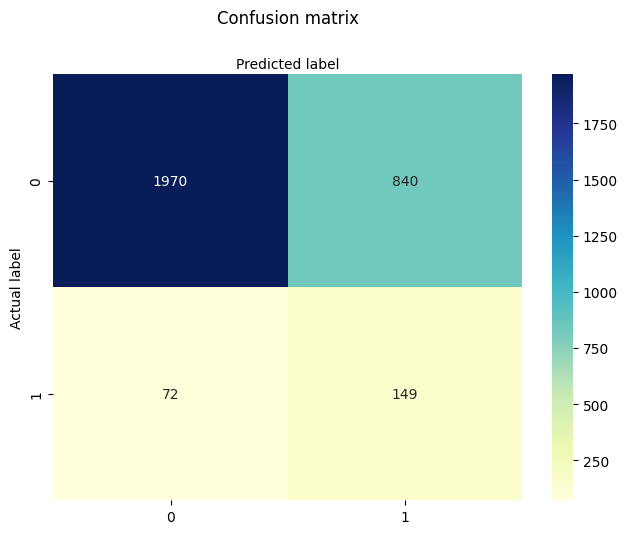

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(SMOTETomek_lg_Recall, SMOTETomek_lg_Precision, SMOTETomek_lg_f1, SMOTETomek_lg_accuracy, SMOTETomek_lg_auc)]
SMOTETomek_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
SMOTETomek_lg_score.insert(0, 'Model', 'logit with SMOTE + Tomek')
SMOTETomek_lg_score

,Model,Recall,Precision,F1 Score,Accuracy,AUC
0,logit with SMOTE + Tomek,0.674208,0.150657,0.246281,0.699109,0.687638


In [ ]:
time_start = time.time()
np.int = int
grid_SMOTETomek_lg.fit(X_train, y_train)
time_grid_SMOTETomek_lg  = time.time() - time_start
values_grid_SMOTETomek_lg  = [0.001, grid_SMOTETomek_lg.best_score_, time_grid_SMOTETomek_lg]
results_grid_SMOTETomek_lg  = pd.DataFrame([values_grid_SMOTETomek_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_SMOTETomek_lg

,logisticregression__C,best_score,time
0,0.001,0.644042,125.134063


## **2. REGRESION LOGISTICA CON OVERSAMPLING**

In [ ]:
!pip install -U imbalanced-learn


In [ ]:
from imblearn.pipeline import Pipeline # Changed from sklearn.pipeline to imblearn.pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use imblearn's Pipeline, ensure to use Pipeline from imblearn
random_overs_pipeline_logit = Pipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('logit', LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))
])

# Correct the parameter name in new_params:
new_params = {'logit__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Instantiate and fit GridSearchCV
grid_over_lg = GridSearchCV(random_overs_pipeline_logit, new_params, scoring='recall', cv=kf)
grid_over_lg.fit(X_train, y_train)

print('Best parameters:', grid_over_lg.best_params_)
print('Best score:', grid_over_lg.best_score_)

Best parameters: {'logit__C': 0.001}
Best score: 0.6381975867269984


In [ ]:
y_pred_over_lg = grid_over_lg.best_estimator_.named_steps['logit'].predict(X_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_over_lg)
over_lg_Recall = recall_score(y_test, y_pred_over_lg)
over_lg_Precision = precision_score(y_test, y_pred_over_lg)
over_lg_f1 = f1_score(y_test, y_pred_over_lg)
over_lg_accuracy = accuracy_score(y_test, y_pred_over_lg)
over_lg_beta_score = fbeta_score(y_test, y_pred_over_lg, beta=2, average='binary')
over_lg_auc = roc_auc_score(y_test, y_pred_over_lg)
print(cm2)

[[1971  839]
 [  72  149]]


Text(0.5, 427.9555555555555, 'Predicted label')

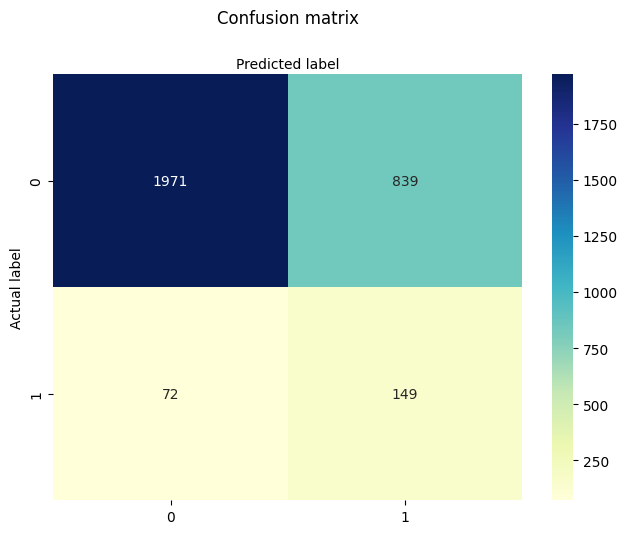

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(over_lg_Recall, over_lg_Precision, over_lg_f1, over_lg_accuracy, over_lg_auc)]

over_lg_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
over_lg_score.insert(0, 'Model', 'Logit with Oversampling')
over_lg_score

,Model,Recall,Precision,F1 Score,Accuracy,AUC
0,Logit with Oversampling,0.674208,0.15081,0.246485,0.699439,0.687816


In [ ]:
time_start = time.time()
np.int = int
grid_over_lg.fit(X_train, y_train)
time_grid_over_lg  = time.time() - time_start
values_grid_over_lg  = [0.001, grid_over_lg.best_score_, time_grid_over_lg]
results_grid_over_lg  = pd.DataFrame([values_grid_over_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_over_lg

,logisticregression__C,best_score,time
0,0.001,0.638198,7.827324


## **3. REGRESION LOGISTICA CON UNDERSAMPLING**

In [ ]:
!pip install imblearn

from imblearn.pipeline import Pipeline # Import imblearn's Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression


In [ ]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use imblearn.Pipeline instead of sklearn.pipeline.Pipeline
random_unders_pipeline_logit = Pipeline([
    ('rus', RandomUnderSampler(random_state=42)),
    ('logit', LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))
])

score3 = cross_val_score(random_unders_pipeline_logit, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.57692308 0.62745098 0.58823529 0.52941176 0.61538462 0.46153846
 0.55769231 0.55769231 0.65384615 0.73076923]
Average Cross Validation Recall score: 0.589894419306184


In [ ]:
new_params = {
    'rus__sampling_strategy': [0.5, 0.75, 1.0],  # Different undersampling ratios
    'logit__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logit__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logit__class_weight': ['balanced']
}

grid_under_lgu = GridSearchCV(random_unders_pipeline_logit, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_under_lgu.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rus',
                                        RandomUnderSampler(random_state=42)),
                                       ('logit',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logit__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logit__class_weight': ['balanced'],
                         'logit__solver': ['lbfgs', 'liblinear'],
                         'rus__sampling_strategy': [0.5, 0.75, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_under_lgu.best_params_)
print('Best score:', grid_under_lgu.best_score_)

Best parameters: {'logit__C': 0.001, 'logit__class_weight': 'balanced', 'logit__solver': 'liblinear', 'rus__sampling_strategy': 0.5}
Best score: 0.6440422322775264


In [ ]:
y_pred_lgu = grid_under_lgu.best_estimator_.named_steps['logit'].predict(X_test)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_lgu)
under_lgu_Recall = recall_score(y_test, y_pred_lgu)
under_lgu_Precision = precision_score(y_test, y_pred_lgu)
under_lgu_f1 = f1_score(y_test, y_pred_lgu)
under_lgu_accuracy = accuracy_score(y_test, y_pred_lgu)
under_lgu_beta_score = fbeta_score(y_test, y_pred_lgu, beta=2, average='binary')
under_lgu_auc = roc_auc_score(y_test, y_pred_lgu)
print(cm3)

[[1877  933]
 [  74  147]]


Text(0.5, 427.9555555555555, 'Predicted label')

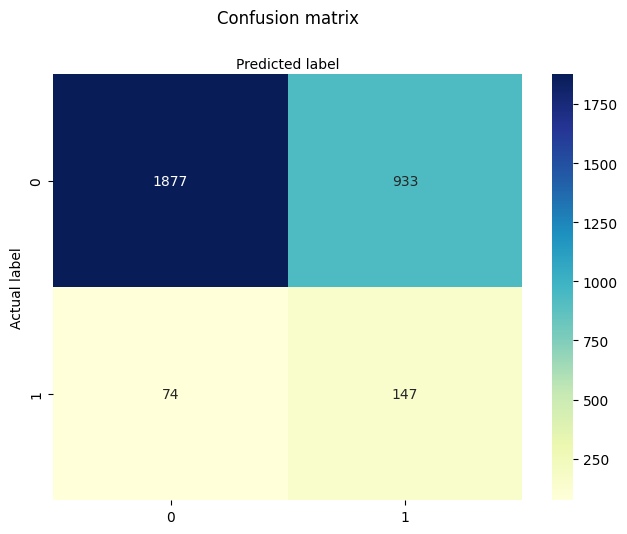

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(under_lgu_Recall, under_lgu_Precision, under_lgu_f1, under_lgu_accuracy, under_lgu_auc)]

under_lgu_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
under_lgu_score.insert(0, 'Model', 'Logit with Undersampling')
under_lgu_score

,Model,Recall,Precision,F1 Score,Accuracy,AUC
0,Logit with Undersampling,0.665158,0.136111,0.22598,0.667766,0.666565


In [ ]:
time_start = time.time()
np.int = int
grid_under_lgu.fit(X_train, y_train)
time_grid_under_lgu  = time.time() - time_start
values_grid_under_lgu  = [0.001, grid_under_lgu.best_score_, time_grid_under_lgu]
results_grid_under_lgu  = pd.DataFrame([values_grid_under_lgu], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_under_lgu

,logisticregression__C,best_score,time
0,0.001,0.644042,34.160032


## **4. XGBOOST CON SUBMUESTREO**

In [ ]:
!pip install xgboost
import xgboost as xgb

No perdida: 517 / 50.0 % of the dataset
perdida: 517 / 50.0 % of the dataset
Best parameters (Undersampling): {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best F1 score (Undersampling): 0.7003016591251885
Accuracy (Undersampled): 0.6179478719894425
Recall (Undersampled): 0.7149321266968326
Precision (Undersampled): 0.12609736632083002
F1 Score (Undersampled): 0.21438263229308005
F2 Score (Undersampled): 0.3696771174543753
AUC Score (Undersampled): 0.6626262056971708


Text(0.5, 427.9555555555555, 'Predicted label')

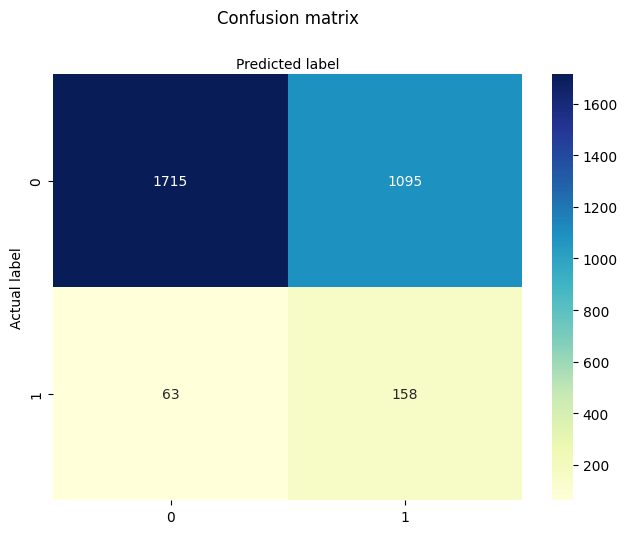

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled_u, y_train_resampled_u = undersampler.fit_resample(X_train, y_train)

print('No perdida:', y_train_resampled_u.value_counts()[0], '/', round(y_train_resampled_u.value_counts()[0]/len(y_train_resampled_u) * 100,2), '% of the dataset')
print('perdida:', y_train_resampled_u.value_counts()[1], '/',round(y_train_resampled_u.value_counts()[1]/len(y_train_resampled_u) * 100,2), '% of the dataset')

# Create an XGBoost classifier
modelXGB_u = xgb.XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a GridSearchCV object
grid_search_u = GridSearchCV(estimator=modelXGB_u, param_grid=param_grid,
                           scoring='recall', cv=10, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search_u.fit(X_train_resampled_u, y_train_resampled_u)

# Print the best parameters and score
print("Best parameters (Undersampling):", grid_search_u.best_params_)
print("Best F1 score (Undersampling):", grid_search_u.best_score_)

# Use the best model for predictions
best_model_undersampled = grid_search_u.best_estimator_
y_pred_undersampled = best_model_undersampled.predict(X_test)

# Evaluate the best model
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
print(f"Accuracy (Undersampled): {accuracy_undersampled}")
recall_undersampled = recall_score(y_test, y_pred_undersampled)
print(f"Recall (Undersampled): {recall_undersampled}")
precision_undersampled = precision_score(y_test, y_pred_undersampled)
print(f"Precision (Undersampled): {precision_undersampled}")
f1_undersampled = f1_score(y_test, y_pred_undersampled)
print(f"F1 Score (Undersampled): {f1_undersampled}")
f2_undersampled = fbeta_score(y_test, y_pred_undersampled, beta=2)
print(f"F2 Score (Undersampled): {f2_undersampled}")
AUC_undersampled = roc_auc_score (y_test, y_pred_undersampled)
print(f"AUC Score (Undersampled): {AUC_undersampled}")

cm4 = confusion_matrix(y_test, y_pred_undersampled)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(recall_undersampled, precision_undersampled, f1_undersampled, accuracy_undersampled, AUC_undersampled)]

XGBoost_score_us = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','AUC'])
XGBoost_score_us.insert(0, 'Model', 'XGBoost with Undersampling')
XGBoost_score_us

,Model,Recall,Precision,F1 Score,Accuracy,AUC
0,XGBoost with Undersampling,0.714932,0.126097,0.214383,0.617948,0.662626


In [ ]:
time_start = time.time()
best_model_undersampled.fit(X_train_resampled_u, y_train_resampled_u)
time_model = time.time() - time_start
values_best_model_undersampled  = [50, grid_search_u.best_score_, time_model]
results_best_model_undersampled  = pd.DataFrame([values_best_model_undersampled], columns=['n_estimators', 'best_score', 'time'])
results_best_model_undersampled

,n_estimators,best_score,time
0,50,0.700302,0.225375


## **5. BOSQUES ALEATORIOS CON SUBMUESTREO**




In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('No perdida:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('perdida:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

No perdida: 517 / 50.0 % of the dataset
perdida: 517 / 50.0 % of the dataset


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier

random_under_pipeline = make_pipeline(RandomUnderSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score5 = cross_val_score(random_under_pipeline, X_under, y_under, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score5))
print("Average Cross Validation Recall score: {}".format(score5.mean()))

Cross Validation Recall Scores are: [0.65384615 0.57692308 0.65384615 0.53846154 0.64705882 0.54901961
 0.50980392 0.53846154 0.53846154 0.63461538]
Average Cross Validation Recall score: 0.584049773755656


In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_under_rf = GridSearchCV(random_under_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_under_rf.fit(X_under, y_under)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_under_rf.best_params_)
print('Best score:', grid_under_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 50}
Best score: 0.6110859728506787


In [ ]:
y_pred_under = grid_under_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm5 = confusion_matrix(y_test, y_pred_under)

under_rf_Recall = recall_score(y_test, y_pred_under)
under_rf_Precision = precision_score(y_test, y_pred_under)
under_rf_f1 = f1_score(y_test, y_pred_under)
under_rf_accuracy = accuracy_score(y_test, y_pred_under)
under_rf_beta_score = fbeta_score(y_test, y_pred_under, beta=2, average='binary')
under_rf_AUC= roc_auc_score (y_test, y_pred_under)
print(cm5)

[[1860  950]
 [  69  152]]


Text(0.5, 427.9555555555555, 'Predicted label')

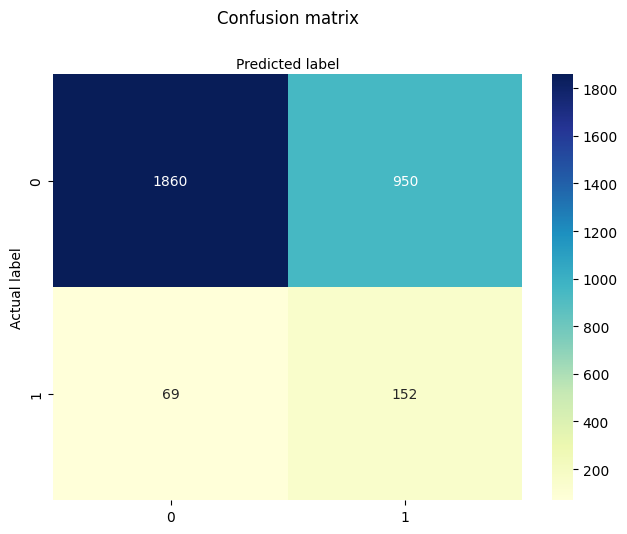

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ndf = [(under_rf_Recall, under_rf_Precision, under_rf_f1, under_rf_accuracy, under_rf_AUC)]

under_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'AUC'])
under_rf_score.insert(0, 'Model', 'Random Forest with Undersampling')
under_rf_score

,Model,Recall,Precision,F1 Score,Accuracy,AUC
0,Random Forest with Undersampling,0.687783,0.137931,0.229781,0.663807,0.674852


In [ ]:
time_start = time.time()
np.int = int
grid_under_rf.fit(X_train, y_train)
time_under_rf = time.time() - time_start
values_under_rf = [100, grid_under_rf.best_score_, time_under_rf]
results_under_rf = pd.DataFrame([values_under_rf], columns=['n_estimators', 'best_score', 'time'])
results_under_rf

,n_estimators,best_score,time
0,100,0.628658,103.857444


## **Comparativo**

In [ ]:
results_df = pd.concat([SMOTETomek_lg_score, over_lg_score, under_lgu_score, XGBoost_score_us, under_rf_score], axis=0)
results_df = results_df.sort_values('Recall', ascending=False)
print(results_df)

                              Model    Recall  Precision  F1 Score  Accuracy  \
0        XGBoost with Undersampling  0.714932   0.126097  0.214383  0.617948   
0  Random Forest with Undersampling  0.687783   0.137931  0.229781  0.663807   
0          logit with SMOTE + Tomek  0.674208   0.150657  0.246281  0.699109   
0           Logit with Oversampling  0.674208   0.150810  0.246485  0.699439   
0          Logit with Undersampling  0.665158   0.136111  0.225980  0.667766   

        AUC  
0  0.662626  
0  0.674852  
0  0.687638  
0  0.687816  
0  0.666565  


In [ ]:
results_df = pd.concat([results_grid_SMOTETomek_lg, results_grid_over_lg, results_grid_under_lgu, results_best_model_undersampled, results_under_rf], axis=0, ignore_index=True)
# Reset the index if needed
results_df = results_df.reset_index(drop=True)

# You can optionally print or save the combined dataframe
print(results_df)
# results_df.to_csv('combined_results.csv', index=False)

   logisticregression__C  best_score        time  n_estimators
0                  0.001    0.644042  125.134063           NaN
1                  0.001    0.638198    7.827324           NaN
2                  0.001    0.644042   34.160032           NaN
3                    NaN    0.700302    0.225375          50.0
4                    NaN    0.628658  103.857444         100.0


## **VALIDACION**

In [ ]:
y_val.value_counts()

,count
PERDIDA_SEGUIMIENTO_N,
0,1873
1,147


## **XGBOOST CON SUBMUESTREO**

In [ ]:
# Apply the best model to the validation set
y_pred_val = best_model_undersampled.predict(X_val)

# Evaluate the model on the validation set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score, fbeta_score

accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy (Validation): {accuracy_val}")
recall_val = recall_score(y_val, y_pred_val)
print(f"Recall (Validation): {recall_val}")
precision_val = precision_score(y_val, y_pred_val)
print(f"Precision (Validation): {precision_val}")
f1_val = f1_score(y_val, y_pred_val)
print(f"F1 Score (Validation): {f1_val}")
f2_val = fbeta_score(y_val, y_pred_val, beta=2)
print(f"F2 Score (Validation): {f2_val}")
AUC_val= roc_auc_score (y_val, y_pred_val)
print(f"AUC Score (Validation): {under_rf_AUC}")

# Confusion matrix
cm_val_XG = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix (Validation):\n", cm_val_XG)

Accuracy (Validation): 0.6193069306930693
Recall (Validation): 0.7006802721088435
Precision (Validation): 0.12439613526570048
F1 Score (Validation): 0.21128205128205127
F2 Score (Validation): 0.3637005649717514
AUC Score (Validation): 0.6748522568074588
Confusion Matrix (Validation):
 [[1148  725]
 [  44  103]]


Text(0.5, 427.9555555555555, 'Predicted label')

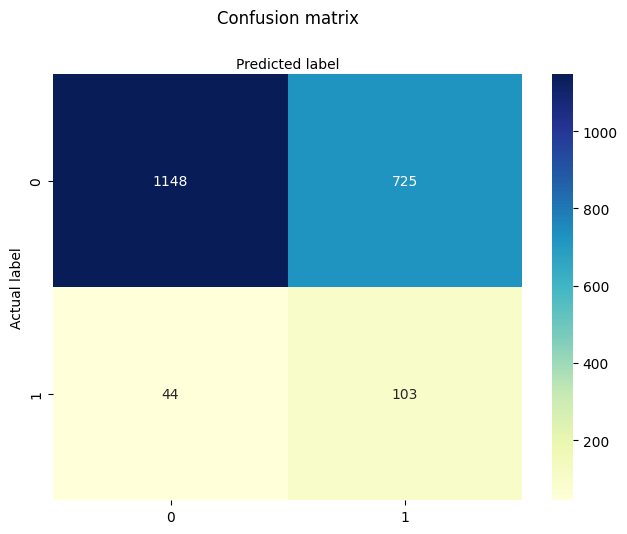

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val_XG), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
pip install shap

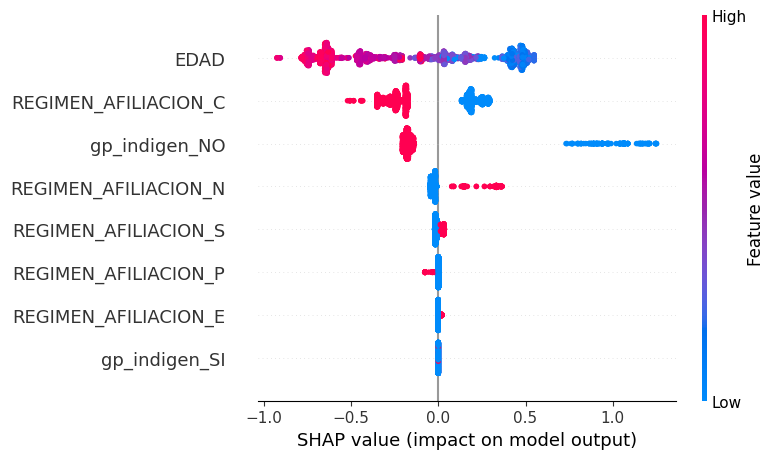

In [ ]:
import shap
shap.initjs()

explainer_xg = shap.Explainer(best_model_undersampled)
shap_values_xg = explainer_xg.shap_values(X_test)
shap.summary_plot(shap_values_xg, X_test)


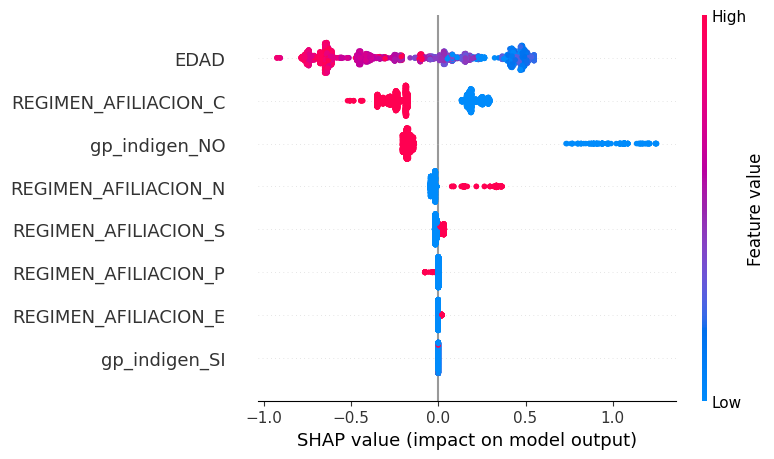

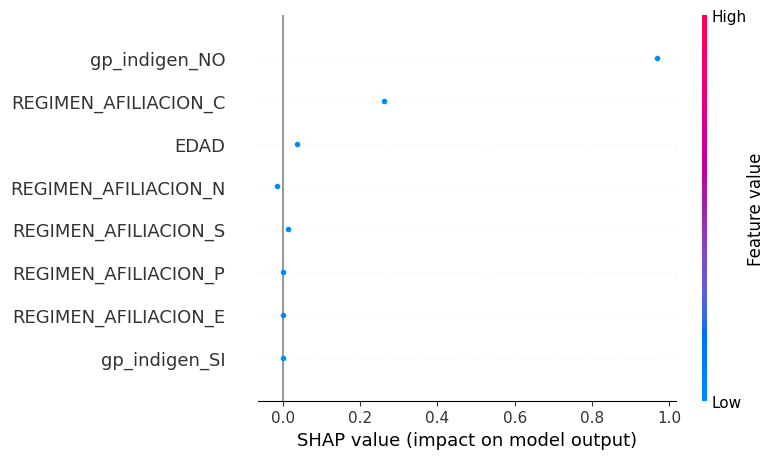

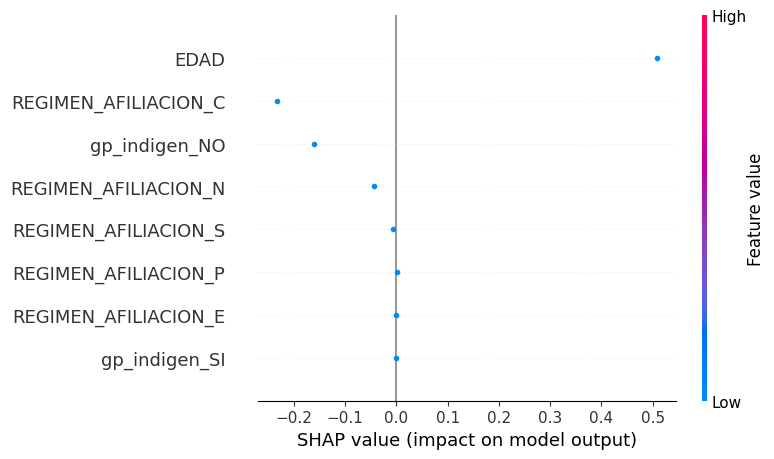

In [ ]:
# Instead of using shap_values_lg[[0]], use the SHAP values for all instances in X_test:
shap.summary_plot(shap_values_xg, X_test)

# If you want to plot for a single instance, you need to slice X_test as well:
shap.summary_plot(shap_values_xg[[0]], X_test.iloc[[0]]) # Notice the double brackets to create a matrix and slicing of X_test

# For the second instance:
shap.summary_plot(shap_values_xg[[1]], X_test.iloc[[1]])

## **RANDOM FOREST CON UNDERSAMPLING**

In [ ]:
# prompt: Aplicar el modelo grid_under_rf.best_estimator_ para los set de validacion X_val, y_val

# Apply the best estimator from grid_under_rf to the validation set
y_pred_val_rf = grid_under_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_val)

# Evaluate the model on the validation set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix

accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"Accuracy (Validation - Random Forest): {accuracy_val_rf}")

recall_val_rf = recall_score(y_val, y_pred_val_rf)
print(f"Recall (Validation - Random Forest): {recall_val_rf}")

precision_val_rf = precision_score(y_val, y_pred_val_rf)
print(f"Precision (Validation - Random Forest): {precision_val_rf}")

f1_val_rf = f1_score(y_val, y_pred_val_rf)
print(f"F1 Score (Validation - Random Forest): {f1_val_rf}")

f2_val_rf = fbeta_score(y_val, y_pred_val_rf, beta=2)
print(f"F2 Score (Validation - Random Forest): {f2_val_rf}")

AUC_val_rf = roc_auc_score(y_val, y_pred_val_rf)
print(f"AUC Score (Validation - Random Forest): {AUC_val_rf}")

# Confusion matrix
cm_val_rf = confusion_matrix(y_val, y_pred_val_rf)
print("Confusion Matrix (Validation - Random Forest):\n", cm_val_rf)

# ... (rest of the code for plotting the confusion matrix and SHAP values)

Accuracy (Validation - Random Forest): 0.6227722772277228
Recall (Validation - Random Forest): 0.6802721088435374
Precision (Validation - Random Forest): 0.12269938650306748
F1 Score (Validation - Random Forest): 0.2079002079002079
F2 Score (Validation - Random Forest): 0.3563791874554526
AUC Score (Validation - Random Forest): 0.6492657928093821
Confusion Matrix (Validation - Random Forest):
 [[1158  715]
 [  47  100]]


Text(0.5, 427.9555555555555, 'Predicted label')

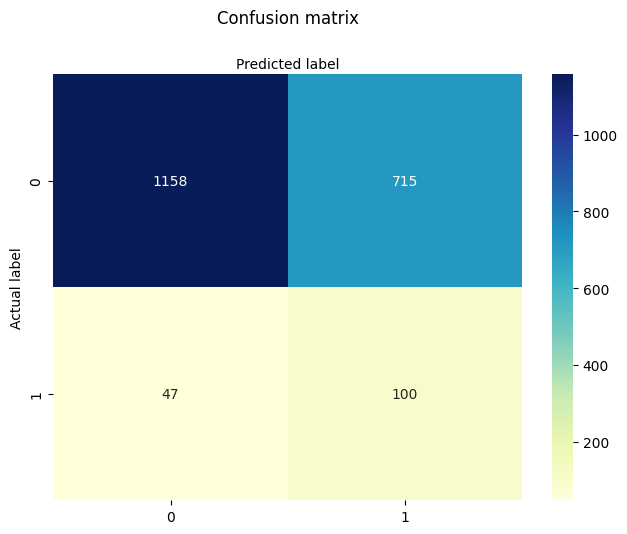

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **REGRESION LOGISTICA CON SOBRESMUESTREO**

Confusion Matrix (Validation - over_lg):
 [[1329  544]
 [  53   94]]
Accuracy (Validation - over_lg): 0.7044554455445544
Recall (Validation - over_lg): 0.6394557823129252
Precision (Validation - over_lg): 0.14733542319749215
F1 Score (Validation - over_lg): 0.2394904458598726
AUC (Validation - over_lg): 0.6745063214821433


Text(0.5, 427.9555555555555, 'Predicted label')

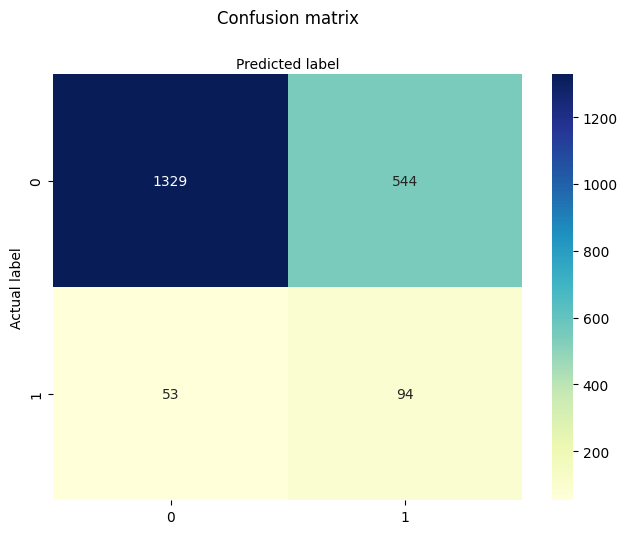

In [ ]:
# prompt: Aplicar el modelo grid_over_lg  para los set de validacion X_val, y_val

# Apply the grid_over_lg model to the validation set
y_pred_val_over_lg = grid_over_lg.best_estimator_.named_steps['logit'].predict(X_val)

# Evaluate the model on the validation set
accuracy_val_over_lg = accuracy_score(y_val, y_pred_val_over_lg)
recall_val_over_lg = recall_score(y_val, y_pred_val_over_lg)
precision_val_over_lg = precision_score(y_val, y_pred_val_over_lg)
f1_val_over_lg = f1_score(y_val, y_pred_val_over_lg)
f2_val_over_lg = fbeta_score(y_val, y_pred_val_over_lg, beta=2)
AUC_val_over_lg= roc_auc_score (y_val, y_pred_val_over_lg)

# Confusion matrix
cm_val_over_lg = confusion_matrix(y_val, y_pred_val_over_lg)
print("Confusion Matrix (Validation - over_lg):\n", cm_val_over_lg)

# Print the results
print(f"Accuracy (Validation - over_lg): {accuracy_val_over_lg}")
print(f"Recall (Validation - over_lg): {recall_val_over_lg}")
print(f"Precision (Validation - over_lg): {precision_val_over_lg}")
print(f"F1 Score (Validation - over_lg): {f1_val_over_lg}")
print(f"AUC (Validation - over_lg): {AUC_val_over_lg}")

# You can also visualize the confusion matrix using seaborn as you did before.
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val_over_lg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ExactExplainer explainer: 3032it [00:34, 79.10it/s]                          


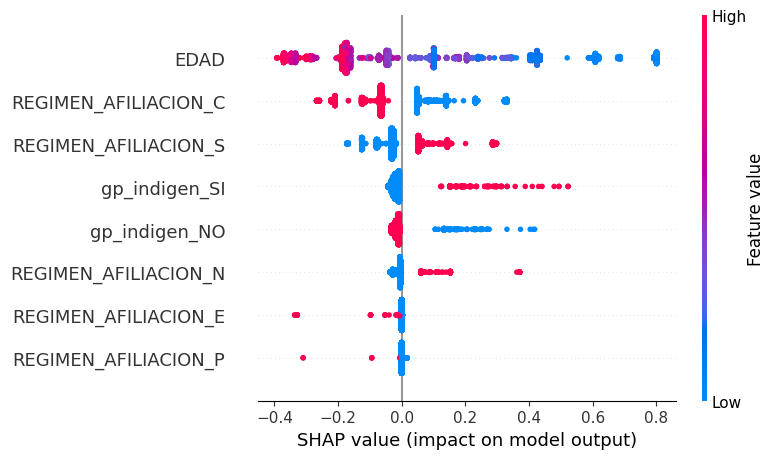

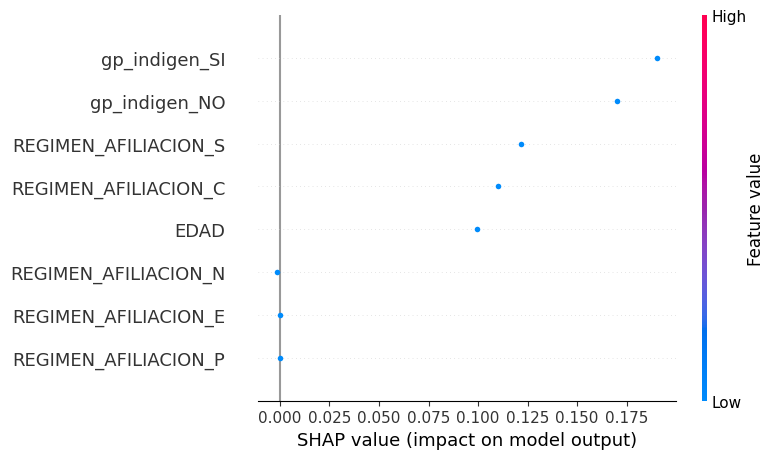

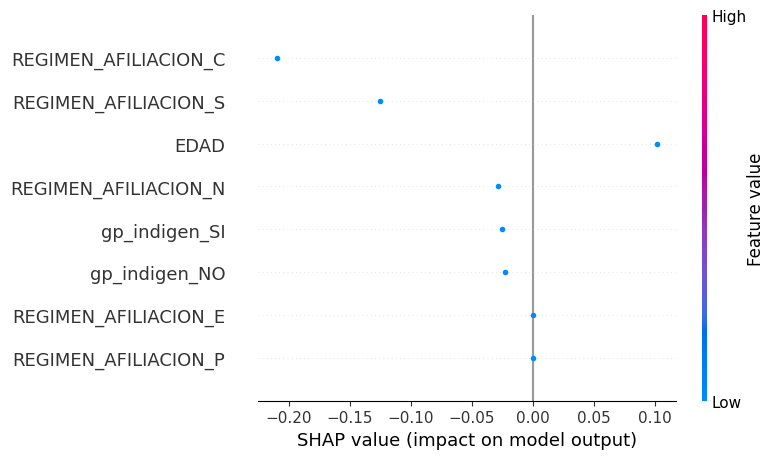

In [ ]:
explainer_lg_over = shap.Explainer(grid_over_lg.best_estimator_.predict, X_test)  # Assuming 'grid_over_lg' is your fitted model

# Now you can calculate the SHAP values
shap_values_lg_over = explainer_lg_over(X_test)

# To visualize for all instances:
shap.summary_plot(shap_values_lg_over, X_test)

# To visualize for a specific instance, slice shap_values_lg_over and X_test accordingly:
shap.summary_plot(shap_values_lg_over[[0]], X_test.iloc[[0]])  # For the first instance
shap.summary_plot(shap_values_lg_over[[1]], X_test.iloc[[1]])  # For the second instance

In [ ]:
# or
#shap.plots.beeswarm(shap_values_lg_over)
#shap.plots.bar(shap_values_lg_over[0])
#shap.plots.waterfall(shap_values_lg_over[0])

## **SEGUNDA VALIDACION**

Se realiza con base preliminar de 2023

In [ ]:
val_ext = pd.read_excel('validacion.xlsx')
val_ext.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,F,59,OTRO,NO,NO,NO,NORTE,C,PULMONAR,NUEVO,NEGATIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,47,OTRO,SI,NO,NO,FDB,C,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,64,OTRO,NO,NO,NO,NORTE,C,EXTRAPULMONAR,NUEVO,NEGATIVO,NEGATIVO,NO,NO,NO,NO,NO
3,4,M,83,OTRO,NO,NO,NO,FDB,C,PULMONAR,NUEVO,NEGATIVO,NEGATIVO,NO,NO,NO,NO,NO
4,5,M,45,OTRO,NO,NO,NO,NORTE,C,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
val_ext.columns

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')

In [ ]:
print(val_ext['PERDIDA_SEGUIMIENTO'].value_counts())

PERDIDA_SEGUIMIENTO
NO    1816
SI     137
Name: count, dtype: int64


In [ ]:
val_ext['PERDIDA_SEGUIMIENTO_N'] = val_ext['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
val_ext2 = pd.DataFrame(val_ext)
val_ext2.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO,PERDIDA_SEGUIMIENTO_N
0,1,F,59,OTRO,NO,NO,NO,NORTE,C,PULMONAR,NUEVO,NEGATIVO,NEGATIVO,NO,NO,NO,NO,NO,0
1,2,M,47,OTRO,SI,NO,NO,FDB,C,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0
2,3,M,64,OTRO,NO,NO,NO,NORTE,C,EXTRAPULMONAR,NUEVO,NEGATIVO,NEGATIVO,NO,NO,NO,NO,NO,0
3,4,M,83,OTRO,NO,NO,NO,FDB,C,PULMONAR,NUEVO,NEGATIVO,NEGATIVO,NO,NO,NO,NO,NO,0
4,5,M,45,OTRO,NO,NO,NO,NORTE,C,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO,0


In [ ]:
categoric_columns2 = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns2 = list(val_ext2.columns)
numeric_columns2 = [i for i in columns if i not in categoric_columns2]
numeric_columns2.remove('ID')
numeric_columns2.remove('PERDIDA_SEGUIMIENTO')
numeric_columns2.remove('PERDIDA_SEGUIMIENTO_N')

In [ ]:
# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output to False

# Convert all columns in val_ext2[categoric_columns2] to string type
val_ext2[categoric_columns2] = val_ext2[categoric_columns2].astype(str)

# Fit and transform the categorical columns
encoded_features2 = enc.fit_transform(val_ext2[categoric_columns2])
# Create a new DataFrame with the encoded features
encoded_val_ext = pd.DataFrame(encoded_features2, columns=enc.get_feature_names_out(categoric_columns2))
print(encoded_val_ext.columns)

Index(['SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VIH_NEGATI

In [ ]:
scaler = StandardScaler()
numerical_features_scaled_val_ext2 = scaler.fit_transform(val_ext2[numeric_columns])
scaled_num_val_ext2 = numerical_features_scaled_val_ext2
encoded_cat_val_ext2 = enc.fit_transform(val_ext2[categoric_columns])
scaled_num_val_ext2 = scaler.transform(val_ext2[numeric_columns])
scaled_num_val_ext2 = pd.DataFrame(scaled_num_val_ext2, columns=numeric_columns, index=val_ext2.index)


# Since sparse=False in OneHotEncoder, encoded_cat_val_ext2 is already a dense array.
# We can directly create a DataFrame from it.
encoded_cat_bp = pd.DataFrame(encoded_cat_val_ext2,
                                 index=val_ext2.index,
                                 columns=enc.get_feature_names_out(categoric_columns))

# Now concatenate the DataFrames
val_externa = pd.concat([scaled_num_val_ext2, encoded_cat_bp, val_ext['PERDIDA_SEGUIMIENTO_N']], axis=1)


In [ ]:
val_externa.head()

,EDAD,SEXO_F,SEXO_M,PERTENENCIA_ETNICA_AFRO,PERTENENCIA_ETNICA_INDIGENA,PERTENENCIA_ETNICA_OTRO,PERTENENCIA_ETNICA_PALENQUERO,PERTENENCIA_ETNICA_RAIZAL,PERTENENCIA_ETNICA_ROOM (GITANO),gp_desplaz_NO,...,CONDICION_VIH_POSITIVO,Consumidor_SPA_NO,Consumidor_SPA_SI,Desnutricion_NO,Desnutricion_SI,Tabaquismo_NO,Tabaquismo_SI,Enf_Mental_NO,Enf_Mental_SI,PERDIDA_SEGUIMIENTO_N
0,0.392976,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,-0.172597,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,0.628632,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,1.524123,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,-0.266859,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
val_externa.columns

Index(['EDAD', 'SEXO_F', 'SEXO_M', 'PERTENENCIA_ETNICA_AFRO',
       'PERTENENCIA_ETNICA_INDIGENA', 'PERTENENCIA_ETNICA_OTRO',
       'PERTENENCIA_ETNICA_PALENQUERO', 'PERTENENCIA_ETNICA_RAIZAL',
       'PERTENENCIA_ETNICA_ROOM (GITANO)', 'gp_desplaz_NO', 'gp_desplaz_SI',
       'gp_migrant_NO', 'gp_migrant_SI', 'gp_indigen_NO', 'gp_indigen_SI',
       'LOC_RES_CO', 'LOC_RES_FDB', 'LOC_RES_NORTE', 'LOC_RES_SO',
       'LOC_RES_SUR', 'LOC_RES_Sin Dato', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S', 'TIPO_TB_EXTRAPULMONAR', 'TIPO_TB_PULMONAR',
       'CONDICION_INGRESO_NUEVO', 'CONDICION_INGRESO_OPT',
       'CONDICION_INGRESO_REMITIDO', 'CONDICION_INGRESO_RTF',
       'CONDICION_INGRESO_RTPS', 'CONDICION_INGRESO_RTR',
       'RESULTADO_BK_RECOD_NEGATIVO', 'RESULTADO_BK_RECOD_NO REALIZADO',
       'RESULTADO_BK_RECOD_POSITIVO', 'RESULTADO_BK_RECOD_SD',
       'CONDICION_VIH_DESCONOCIDO', 'CONDICION_VI

In [ ]:
selected_variables = ['EDAD', 'gp_indigen_NO', 'gp_indigen_SI', 'REGIMEN_AFILIACION_C',
       'REGIMEN_AFILIACION_E', 'REGIMEN_AFILIACION_N', 'REGIMEN_AFILIACION_P',
       'REGIMEN_AFILIACION_S']

# Get the actual columns present in bp2
val_externa_columns = val_externa.columns.tolist()

Accuracy (External Validation): 0.6134152585765489
Recall (External Validation): 0.6934306569343066
Precision (External Validation): 0.11757425742574257
F1 Score (External Validation): 0.20105820105820105
F2 Score (External Validation): 0.3502949852507375
AUC Score (External Validation): 0.6504047557799286
Confusion Matrix (External Validation):
 [[1103  713]
 [  42   95]]


Text(0.5, 427.9555555555555, 'Predicted label')

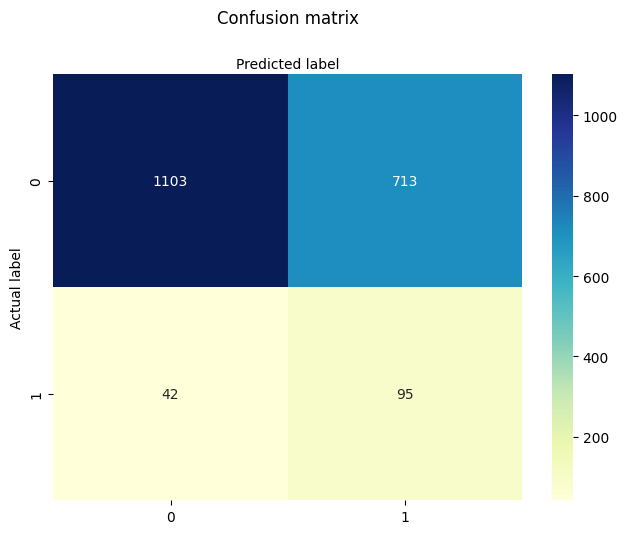

In [ ]:
# prompt: Aplicar el modelo best_model_undersampled  para predecir val_externa

# Assuming 'best_model_undersampled' is already defined and trained.
# Also assuming X_val and y_val are defined for the external validation set.

# Predict on the external validation set
y_pred_val_externa = best_model_undersampled.predict(val_externa[selected_variables])

# Evaluate the model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix

accuracy_val_externa = accuracy_score(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa)
print(f"Accuracy (External Validation): {accuracy_val_externa}")

recall_val_externa = recall_score(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa)
print(f"Recall (External Validation): {recall_val_externa}")

precision_val_externa = precision_score(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa)
print(f"Precision (External Validation): {precision_val_externa}")

f1_val_externa = f1_score(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa)
print(f"F1 Score (External Validation): {f1_val_externa}")

f2_val_externa = fbeta_score(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa, beta=2)
print(f"F2 Score (External Validation): {f2_val_externa}")

AUC_val_externa = roc_auc_score(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa)
print(f"AUC Score (External Validation): {AUC_val_externa}")

# Confusion matrix
cm_val_externa = confusion_matrix(val_externa['PERDIDA_SEGUIMIENTO_N'], y_pred_val_externa)
print("Confusion Matrix (External Validation):\n", cm_val_externa)

# ... (rest of the code for plotting the confusion matrix and potentially SHAP values)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val_externa), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')